In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def metropolis_step(lattice, beta):
    N = lattice.shape[0]
    sites = torch.randint(0, N * N, (N * N,), device=device)
    i, j = sites // N, sites % N
    
    neighbors_sum = (lattice[(i+1)%N, j] + lattice[(i-1)%N, j] + 
                     lattice[i, (j+1)%N] + lattice[i, (j-1)%N])
    delta_E = 2 * lattice[i, j] * neighbors_sum
    
    random_numbers = torch.rand(N * N, device=device)
    flip_mask = (delta_E <= 0) | (random_numbers < torch.exp(-beta * delta_E))
    
    lattice[i[flip_mask], j[flip_mask]] *= -1
    return lattice

def generate_ising_timeseries(N, num_steps, beta):
    lattice = 2 * torch.randint(2, (N, N), device=device) - 1
    timeseries = torch.empty((num_steps, N, N), device=device)
    for step in range(num_steps):
        lattice = metropolis_step(lattice, beta)
        timeseries[step] = lattice
    return timeseries

# Generate Ising model time series
N = 30  # 8x8 grid
num_steps = 1000
beta = 0.57 # inverse temperature

with torch.no_grad():
    ising_timeseries = generate_ising_timeseries(N, num_steps, beta)


Using device: cuda


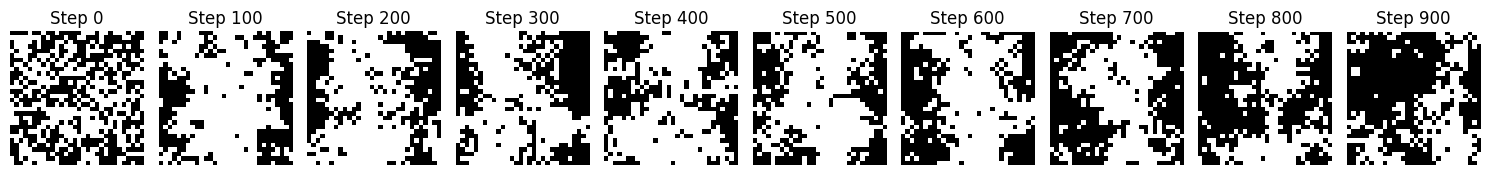

: 

In [87]:
fig, axes = plt.subplots(1, 10, figsize=(15, 6))
for i, ax in enumerate(axes):
    # Move tensor to CPU before converting to numpy
    ax.imshow(ising_timeseries[i*100].cpu().numpy(), cmap='binary')
    ax.set_title(f"Step {i*100}")
    ax.axis('off')
plt.tight_layout()
plt.show()
